<a href="https://colab.research.google.com/github/stevecwb/Resist-ncia-dos-Materiais/blob/main/Terceira_Atividade_Computacional_(C3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM423 - Atividade Computacional III

Estevão Sanches Rodrigues, 168030

## Bibliotecas Importadas

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Definição das Funções de Singularidade

As funções recebem como entrada o valor $x$ e um valor $a$ que no caso representa o ponto de partida da função: $<x-a>^n$.

In [176]:
def heaviside_ponctual(x,a):
  # função singular com n = -2
  if (x-a) < 0 or (x-a) > 0:
    return 0
  else: 
    return (x-a)**(-2)

def heaviside_constant(x,a):
  # função singular com n = 0
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**0

def heaviside_triangular(x,a):
  # função singular com n = 1
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**1

def heaviside_quadratic(x,a):
  # função singular com n = 2
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**2

def heaviside_cubic(x,a):
  # função singular com n = 3
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**3

def heaviside_quarter(x,a):
  # função singular com n = 4
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**4

## Exercício 1

### Letra A

In [177]:
E = 200*(10**9) # Pa

### Letra B

In [178]:
L1 = 3.2 #m
L2 = 4.3 #m
q0 = 26*1000 #N/m
alpha = 58 #º
a = 375*(10**(-3)) #m
b = 115*(10**(-3)) #m
c = 195*(10**(-3)) #m
d = 50*(10**(-3)) #m
e = 150*(10**(-3)) #m
f = 160*(10**(-3)) #m

In [179]:
A = (a*(b + e + f) - b**2 - b*f)

xc = a/2
y = ((b**2)*(a+2*c) + 3*(a*e**2 + c*f**2) + 6*(a*b*e + b*c*f + c*e*f))/(6*(a*(b + e + f) - b**2 - b*f))

Ix = ((b**3)*(a**2 + 4*a*c + c**2))/(36*(a+c)) + (a*e**3)/(12) + (c*f**3)/(12)
Ady2 = ((b*(a+c))/(2))*((y - (b*(a + 2*c))/(3*(a + c)))**2) + (a*e)*((e/2 + b - y)**2) + (c*f)*((f/2 + b + e - y)**2)
Izz = Ix + Ady2
dtn = y
dbn = b + e + f - y

print(f'A área da figura é {A:0.4} m^2')
print(f'A posição x do centroide é {xc} m')
print(f'A posição y do centroide (e a linha neutra) é {y:0.4} m')
print(f'O momento de inércia de área da seção transversal em relação ao eixo horizontal é {Izz:.4e} m^4')
print(f'A distância da linha neutra até o topo é {dtn:.4} m')
print(f'A distância da linha neutra até a base é {dbn:.4} m')

A área da figura é 0.1278 m^2
A posição x do centroide é 0.1875 m
A posição y do centroide (e a linha neutra) é 0.1811 m
O momento de inércia de área da seção transversal em relação ao eixo horizontal é 1.6004e-03 m^4
A distância da linha neutra até o topo é 0.1811 m
A distância da linha neutra até a base é 0.2439 m


### Letra C

In [180]:
def ux_letraC(x, q0, L1, L2):
  ux = ((1)/(E*A))*(-((q0*np.cos(alpha*np.pi/180))/(2))*heaviside_quadratic(x,0) + (q0*np.cos(alpha*np.pi/180))*heaviside_quadratic(x, L1) + q0*np.cos(alpha*np.pi/180)*(L1-L2)*x)
  return ux

Resolução do sistema de 3 equações para descobrir as constantes de integração:

In [181]:
a_ = np.array([[L1, 1, 0], [((L1+L2)**3)/6, ((L1+L2)**2)/2, E*Izz*(L2)], [L1+L2, 1, E*Izz*(L2**(-1))]])
b_ = np.array([(q0*np.sin(alpha*np.pi/180)*(L1**2))/2, (q0*np.sin(alpha*np.pi/180)*((L1+L2)**4) - 2*q0*np.sin(alpha*np.pi/180)*((L2)**4))/24, (q0*np.sin(alpha*np.pi/180)*((L1+L2)**2) - 2*q0*np.sin(alpha*np.pi/180)*((L2)**2))/2])
x_ = np.linalg.solve(a_, b_)

print(x_)

[ 2.75934154e+04  2.45932334e+04 -2.56577879e-04]


In [182]:
def vx_letraC(x, q0, L1, L2):
  vx = ((1)/(E*Izz))*(((-q0*np.sin(alpha*np.pi/180))/(24))*heaviside_quarter(x, 0) + ((2*q0*np.sin(alpha*np.pi/180))/(24))*heaviside_quarter(x, L1) + (E*Izz*x_[2])*heaviside_triangular(x, L1) + ((x_[0]*x**3)/(6)) + ((x_[1]*x**2)/(2)))
  return vx

def thetaz_letraC(x, q0, L1, L2):
  thetaz = ((1)/(E*Izz))*(((-q0*np.sin(alpha*np.pi/180))/(6))*heaviside_cubic(x, 0) + ((2*q0*np.sin(alpha*np.pi/180))/(6))*heaviside_cubic(x, L1) + (E*Izz*x_[2])*heaviside_constant(x, L1) + ((x_[0]*x**2)/(2)) + (x_[1]*x))
  return thetaz

O ponto com o módulo do deslocamento máximo é 4.19 m
O deslocamento máximo é 0.000598 m


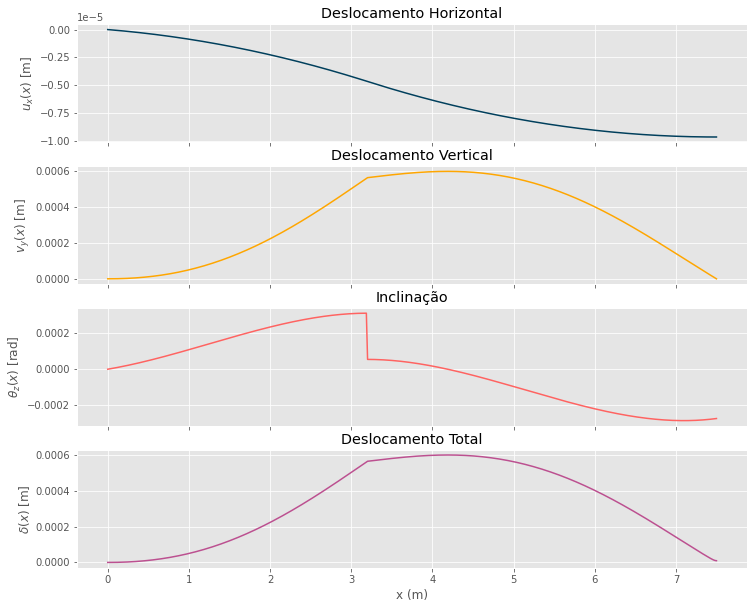

In [183]:
j = 500 # número de pontos para o gráfico
t = np.array(np.linspace(0,L1+L2,j))

ux = np.empty(j)
vy = np.empty(j)
thetaz = np.empty(j)
delta = np.empty(j)

for i in range(j):
  k = ux_letraC(t[i], q0, L1 ,L2)
  k1 = vx_letraC(t[i], q0, L1 ,L2)
  k2 = thetaz_letraC(t[i], q0, L1 ,L2)
  ux[i] = k
  vy[i] = k1
  thetaz[i] = k2
  delta[i] = (k**2 + k1**2)**0.5

x_max = t[np.where(delta == np.max(delta))][0]
deslo_max = np.max(delta)

print(f'O ponto com o módulo do deslocamento máximo é {x_max:.3} m')
print(f'O deslocamento máximo é {deslo_max:.3} m')

  #print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(4,figsize=(12,10))
axs[0].plot(t, ux, c='#003f5c')
axs[0].set_title('Deslocamento Horizontal')
axs[0].set_ylabel('$u_x(x)$ [m]')
axs[1].plot(t, vy, c='#ffa600')
axs[1].set_title('Deslocamento Vertical')
axs[1].set_ylabel('$v_y(x)$ [m]')
axs[2].plot(t, thetaz, c='#ff6361')
axs[2].set_title('Inclinação')
axs[2].set_ylabel('$θ_z(x)$ [rad]')
axs[3].plot(t, delta, c='#bc5090')
axs[3].set_title('Deslocamento Total')
axs[3].set_ylabel('$\delta(x)$ [m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Letra D

In [184]:
def Nx_letraD(x, q0, L1, L2):
  Nx = -q0*np.cos(alpha*np.pi/180)*heaviside_triangular(x,0) + 2*q0*np.cos(alpha*np.pi/180)*heaviside_triangular(x, L1) + q0*np.cos(alpha*np.pi/180)*(L1-L2)
  ten=Nx/A
  return ten
  
def Vy_letraD(x, q0, L1, L2, A_):
  Vy = -q0*np.sin(alpha*np.pi/180)*heaviside_triangular(x,0) + 2*q0*np.sin(alpha*np.pi/180)*heaviside_triangular(x, L1) + E*Izz*x_[2]*heaviside_ponctual(x,L1) + x_[0]
  ten_ = Vy/A_
  return ten_


A máxima tensão de tração é de 3.55e+04 Pa
A máxima tensão de compressão é de -4.64e+05 Pa


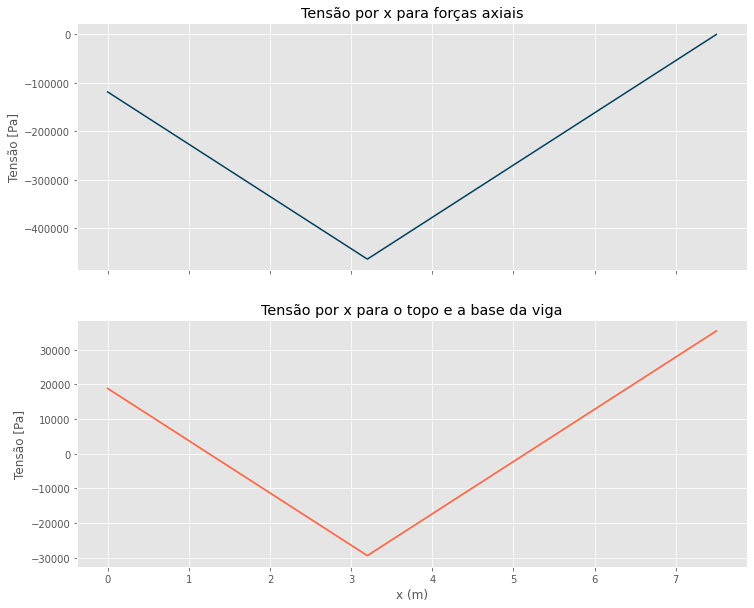

In [185]:
j = 500 # número de pontos para o gráfico
t = np.array(np.linspace(0,L1+L2,j))

tensaox = np.empty(j)
tensao_topo = np.empty(j)
tensao_base = np.empty(j)


for i in range(j):
  k = Nx_letraD(t[i], q0, L1 ,L2)
  k1 = Vy_letraD(t[i], q0, L1 ,L2, c*(L1+L2))
  k2 = Vy_letraD(t[i], q0, L1 ,L2, c*(L1+L2))
  tensaox[i] = k
  tensao_topo[i] = k1
  tensao_base[i] = k2

  #print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(12,10))
axs[0].plot(t, tensaox, c='#003f5c')
axs[0].set_title('Tensão por x para forças axiais')
axs[0].set_ylabel('Tensão [Pa]')
axs[1].plot(t, tensao_topo, c='#ffa600')
axs[1].set_title('Tensão por x para o topo e a base da viga')
axs[1].set_ylabel('Tensão [Pa]')
axs[1].plot(t, tensao_base, c='#ff6361')
axs[1].set_title('Tensão por x para o topo e a base da viga')
axs[1].set_ylabel('Tensão [Pa]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

traçao = np.max(tensao_base)
compressão = np.min(tensaox)

print(f'A máxima tensão de tração é de {traçao:.3} Pa')
print(f'A máxima tensão de compressão é de {compressão:.3} Pa')

### Letra E

Resolução do sistema de 3 equações para descobrir as constantes de integração:

In [186]:
a_ = np.array([[((L1+L2)**3)/6, ((L1+L2)**2)/2], [L1+L2, 1]])
b_ = np.array([ (q0*np.sin(alpha*np.pi/180)*((L1+L2)**4) - 2*q0*np.sin(alpha*np.pi/180)*((L2)**4))/24, (q0*np.sin(alpha*np.pi/180)*((L1+L2)**2) - 2*q0*np.sin(alpha*np.pi/180)*((L2)**2))/2])
x_ = np.linalg.solve(a_, b_)

print(x_)

[26284.81483108 15308.41733502]


In [187]:
def vx_letraE(x, q0, L1, L2):
  vx = ((1)/(E*Izz))*(((-q0*np.sin(alpha*np.pi/180))/(24))*heaviside_quarter(x, 0) + ((2*q0*np.sin(alpha*np.pi/180))/(24))*heaviside_quarter(x, L1) + ((x_[0]*x**3)/(6)) + ((x_[1]*x**2)/(2)))
  return vx

def thetaz_letraE(x, q0, L1, L2):
  thetaz = ((1)/(E*Izz))*(((-q0*np.sin(alpha*np.pi/180))/(6))*heaviside_cubic(x, 0) + ((2*q0*np.sin(alpha*np.pi/180))/(6))*heaviside_cubic(x, L1) + ((x_[0]*x**2)/(2)) + (x_[1]*x))
  return thetaz

O ponto com o módulo do deslocamento máximo é 4.79 m
O deslocamento máximo é 0.000579 m


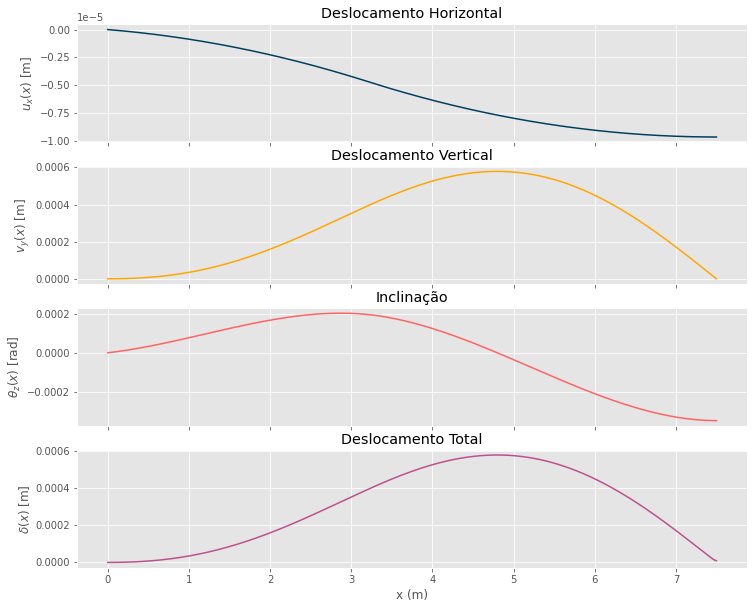

In [188]:
j = 500 # número de pontos para o gráfico
t = np.array(np.linspace(0,L1+L2,j))

ux = np.empty(j)
vy = np.empty(j)
thetaz = np.empty(j)
delta = np.empty(j)

for i in range(j):
  k = ux_letraC(t[i], q0, L1 ,L2)
  k1 = vx_letraE(t[i], q0, L1 ,L2)
  k2 = thetaz_letraE(t[i], q0, L1 ,L2)
  ux[i] = k
  vy[i] = k1
  thetaz[i] = k2
  delta[i] = (k**2 + k1**2)**0.5

x_max = t[np.where(delta == np.max(delta))][0]
deslo_max = np.max(delta)

print(f'O ponto com o módulo do deslocamento máximo é {x_max:.3} m')
print(f'O deslocamento máximo é {deslo_max:.3} m')

  #print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(4,figsize=(12,10))
axs[0].plot(t, ux, c='#003f5c')
axs[0].set_title('Deslocamento Horizontal')
axs[0].set_ylabel('$u_x(x)$ [m]')
axs[1].plot(t, vy, c='#ffa600')
axs[1].set_title('Deslocamento Vertical')
axs[1].set_ylabel('$v_y(x)$ [m]')
axs[2].plot(t, thetaz, c='#ff6361')
axs[2].set_title('Inclinação')
axs[2].set_ylabel('$θ_z(x)$ [rad]')
axs[3].plot(t, delta, c='#bc5090')
axs[3].set_title('Deslocamento Total')
axs[3].set_ylabel('$\delta(x)$ [m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Tensões:

In [189]:
def Vy_letraE(x, q0, L1, L2, A_):
  Vy = -q0*np.sin(alpha*np.pi/180)*heaviside_triangular(x,0) + 2*q0*np.sin(alpha*np.pi/180)*heaviside_triangular(x, L1) + x_[0]
  ten_ = Vy/A_
  return ten_

A máxima tensão de tração é de 3.46e+04 Pa
A máxima tensão de compressão é de -4.64e+05 Pa


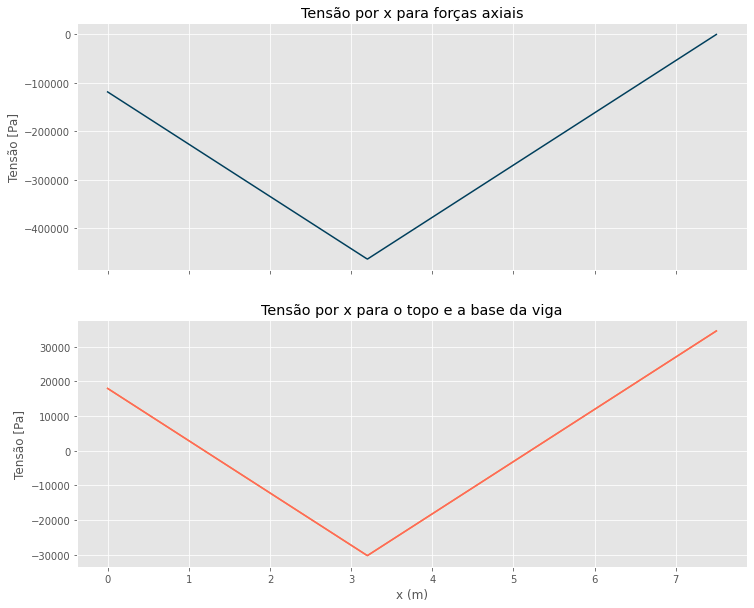

In [190]:
j = 500 # número de pontos para o gráfico
t = np.array(np.linspace(0,L1+L2,j))

tensaox = np.empty(j)
tensao_topo = np.empty(j)
tensao_base = np.empty(j)


for i in range(j):
  k = Nx_letraD(t[i], q0, L1 ,L2)
  k1 = Vy_letraE(t[i], q0, L1 ,L2, c*(L1+L2))
  k2 = Vy_letraE(t[i], q0, L1 ,L2, c*(L1+L2))
  tensaox[i] = k
  tensao_topo[i] = k1
  tensao_base[i] = k2

  #print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(12,10))
axs[0].plot(t, tensaox, c='#003f5c')
axs[0].set_title('Tensão por x para forças axiais')
axs[0].set_ylabel('Tensão [Pa]')
axs[1].plot(t, tensao_topo, c='#ffa600')
axs[1].set_title('Tensão por x para o topo e a base da viga')
axs[1].set_ylabel('Tensão [Pa]')
axs[1].plot(t, tensao_base, c='#ff6361')
axs[1].set_title('Tensão por x para o topo e a base da viga')
axs[1].set_ylabel('Tensão [Pa]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

traçao = np.max(tensao_base)
compressão = np.min(tensaox)

print(f'A máxima tensão de tração é de {traçao:.3} Pa')
print(f'A máxima tensão de compressão é de {compressão:.3} Pa')

## Exercício 2

### Letra A

In [191]:
n = 4

d = [35*10**(-3), 60*10**(-3), 40*10**(-3), 30*10**(-3)] # m
L = [1.1, 0.7, 0.6, 0.9] #m
G = [63.2*10**(9), 69.0*10**(9), 66.8*10**(9), 76.3*10**(9)] # Pa
T = [10.2*10**(3), 8.3*10**(3), 14.7*10**(3), 12.0*10**(3)] # N*m

In [192]:
def Tx_letraA(x):
  Tx = -T[0]*heaviside_constant(x, L[0]) - T[1]*heaviside_constant(x, L[0]+L[1]) - T[2]*heaviside_constant(x, L[0]+L[1]+L[2]) + sum(T)
  return Tx

def tau(x, rho):
  Jp = (np.pi*((2*rho))**4)/(32)
  tauf = (Tx_letraA(x)*rho)/(Jp)
  return tauf

Segmento 1: máxima tensão de cisalhamento é de 5.37 GPa
Segmento 2: máxima tensão de cisalhamento é de 0.825 GPa
Segmento 3: máxima tensão de cisalhamento é de 2.12 GPa
Segmento 4: máxima tensão de cisalhamento é de 2.26 GPa


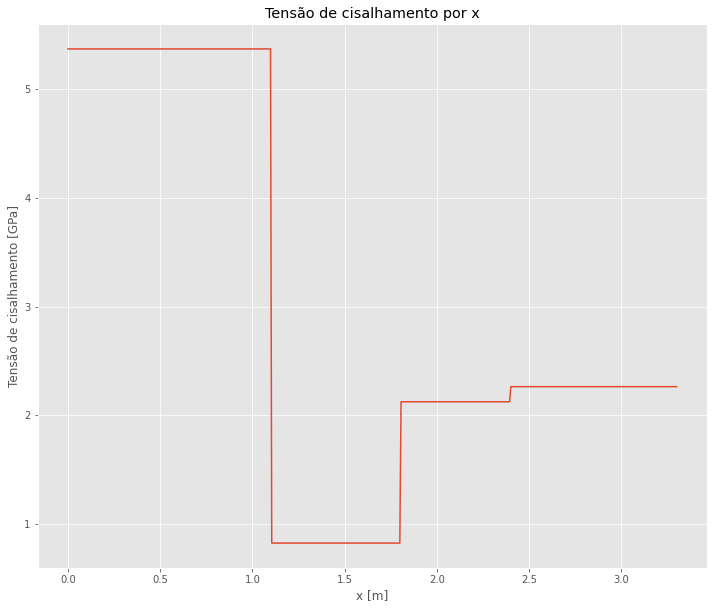

In [193]:
j = 500 # número de pontos para o gráfico
t = np.array(np.linspace(0,sum(L),j))

tau_ = np.empty(j)

#print(tau)

for i in range(j):
  if t[i] <= L[0]:
    rho = d[0]/2
    tau_[i] = tau(t[i], rho)*10**(-9)
  elif t[i] > L[0] and t[i] <= L[0] + L[1]:
    rho = d[1]/2
    tau_[i] = tau(t[i], rho)*10**(-9)
  elif t[i] > L[0] + L[1] and t[i] <= L[0] + L[1] + L[2]:
    rho = d[2]/2
    tau_[i] = tau(t[i], rho)*10**(-9)
  else:
    rho = d[3]/2
    tau_[i] = tau(t[i], rho)*10**(-9)

fig=plt.figure(figsize=(12, 10))
plt.style.use('ggplot')
plt.plot(t,tau_)
plt.xlabel('x [m]')
plt.ylabel('Tensão de cisalhamento [GPa]')
plt.title('Tensão de cisalhamento por x')

s1 = tau_[np.where(t == 0)][0]
s2 = tau_[200]
s3 = tau_[300]
s4 = tau_[400]


print(f'Segmento 1: máxima tensão de cisalhamento é de {s1:.3} GPa')
print(f'Segmento 2: máxima tensão de cisalhamento é de {s2:.3} GPa')
print(f'Segmento 3: máxima tensão de cisalhamento é de {s3:.3} GPa')
print(f'Segmento 4: máxima tensão de cisalhamento é de {s4:.3} GPa')

### Letra B

Segmento 1: ângulo de torção é de 5.34 rad
Segmento 2: ângulo de torção é de 0.279 rad
Segmento 3: ângulo de torção é de 0.954 rad
Segmento 4: ângulo de torção é de 1.78 rad


Text(0.5, 1.0, 'Ângulo de torção por x')

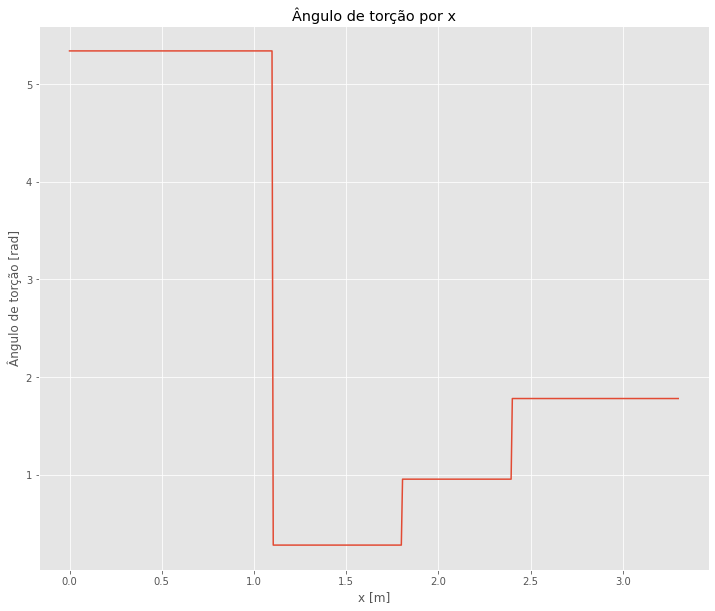

In [194]:
j = 500 # número de pontos para o gráfico
t = np.array(np.linspace(0,sum(L),j))

phi = np.empty(j)
#print(tau)

for i in range(j):
  if t[i] <= L[0]:
    J = (np.pi*((d[0]))**4)/(32)
    phi[i] = (Tx_letraA(t[i])*L[0])/(G[0]*J)
  elif t[i] > L[0] and t[i] <= L[0] + L[1]:
    J = (np.pi*((d[1]))**4)/(32)
    phi[i] = (Tx_letraA(t[i])*L[1])/(G[1]*J)
  elif t[i] > L[0] + L[1] and t[i] <= L[0] + L[1] + L[2]:
    J = (np.pi*((d[2]))**4)/(32)
    phi[i] = (Tx_letraA(t[i])*L[2])/(G[2]*J)
  else:
    J = (np.pi*((d[3]))**4)/(32)
    phi[i] = (Tx_letraA(t[i])*L[3])/(G[3]*J)

s1 = phi[0]
s2 = phi[200]
s3 = phi[300]
s4 = phi[400]


print(f'Segmento 1: ângulo de torção é de {s1:.3} rad')
print(f'Segmento 2: ângulo de torção é de {s2:.3} rad')
print(f'Segmento 3: ângulo de torção é de {s3:.3} rad')
print(f'Segmento 4: ângulo de torção é de {s4:.3} rad')


fig=plt.figure(figsize=(12, 10))
plt.style.use('ggplot')
plt.plot(t,phi)
plt.xlabel('x [m]')
plt.ylabel('Ângulo de torção [rad]')
plt.title('Ângulo de torção por x')


### Letra C

In [195]:
phi_extremidade = np.sum(np.unique(phi))

print(f'O valor do ângulo de torção da extremidade livre do eixo em relação ao engaste é {phi_extremidade:.3} rad')

O valor do ângulo de torção da extremidade livre do eixo em relação ao engaste é 8.35 rad
